In [1]:
import timeit
import numpy as np
import pandas as pd
from functools import partial
import matplotlib.pyplot as plt

from skimage.filters import threshold_otsu
import pyclesperanto_prototype as proto
import pyclesperanto as cle

cle.select_device()
cle.set_wait_for_kernel_to_finish(True)

proto.select_device()
proto.set_wait_for_kernel_finish(True)

sizes = np.arange(1, 200, 10)

warmup_iter = 1
eval_iter = 3
seed_value = 42

pyclesperanto version: 0.6.6a1


In [2]:
def mb_to_bytes(mb:int = 1) -> int:
    return mb * 1024 * 1024

def shape_from_elements(bytes:int) -> tuple:
    elements = bytes / 4
    shape = int(np.power(elements, 1/3))
    return (shape, shape, shape)

def generate_random_image(size:int = 128) -> np.ndarray:
    """
    Generates a random image of given size and sigma.
    """
    shape = shape_from_elements(mb_to_bytes(size))
    return np.random.rand(shape[0], shape[1], shape[2]).astype(np.float32)

def benchmark_function(target_function, operation:str, framework:str) -> pd.DataFrame:
    """
    Tests a function on a couple of image sizes and returns times taken for processing.
    """
    np.random.seed(seed_value)
    benchmark_data = []
    for size in sizes:
        # make new data
        image = generate_random_image(size)
        size_mb = image.size * image.itemsize / 1024 / 1024
        # bind target function to given image
        partial_function = partial(target_function, image)
        # warmup       
        _ = timeit.timeit(partial_function, number=warmup_iter)
        # measure execution time
        time_in_s = timeit.timeit(partial_function, number=eval_iter)
        
        print(f"Processing {image.shape} of {size_mb} Mb with {framework}... {time_in_s} s")

        # store results
        benchmark_data.append(pd.DataFrame({"benchmark": operation, "framework": framework, "size": size_mb, "time": time_in_s}, index=[0]))
    return pd.concat(benchmark_data)

# Threshold Otsu

### Prototype

In [3]:
def prototype_function(image):
    proto.threshold_otsu(source=image)

In [4]:
prototype_benchmark_data = benchmark_function(prototype_function, "otsu", "prototype")

Processing (63, 63, 63) of 0.9538536071777344 Mb with prototype... 0.020660260983277112 s
Processing (142, 142, 142) of 10.922576904296875 Mb with prototype... 0.06335158599540591 s
Processing (176, 176, 176) of 20.796875 Mb with prototype... 0.07990697398781776 s
Processing (201, 201, 201) of 30.97763442993164 Mb with prototype... 0.11547238100320101 s
Processing (220, 220, 220) of 40.618896484375 Mb with prototype... 0.12309727497631684 s
Processing (237, 237, 237) of 50.78145217895508 Mb with prototype... 0.158790203044191 s
Processing (251, 251, 251) of 60.3227653503418 Mb with prototype... 0.18204651499399915 s
Processing (265, 265, 265) of 70.99008560180664 Mb with prototype... 0.17640772298909724 s
Processing (276, 276, 276) of 80.202392578125 Mb with prototype... 0.17950016702525318 s
Processing (287, 287, 287) of 90.17907333374023 Mb with prototype... 0.21661497803870589 s
Processing (298, 298, 298) of 100.95059204101562 Mb with prototype... 0.22899959998903796 s
Processing (3

### Pyclesperanto

In [5]:
def pycle_function(image):
    cle.threshold_otsu(input_image=image)

In [6]:
pycle_benchmark_data = benchmark_function(pycle_function, "otsu", "pyclesperanto")

Processing (63, 63, 63) of 0.9538536071777344 Mb with pyclesperanto... 0.010111182986292988 s
Processing (142, 142, 142) of 10.922576904296875 Mb with pyclesperanto... 0.04536452598404139 s
Processing (176, 176, 176) of 20.796875 Mb with pyclesperanto... 0.0689685620018281 s
Processing (201, 201, 201) of 30.97763442993164 Mb with pyclesperanto... 0.10139432694995776 s
Processing (220, 220, 220) of 40.618896484375 Mb with pyclesperanto... 0.1924398840055801 s
Processing (237, 237, 237) of 50.78145217895508 Mb with pyclesperanto... 0.24828140798490494 s
Processing (251, 251, 251) of 60.3227653503418 Mb with pyclesperanto... 0.2838474049931392 s
Processing (265, 265, 265) of 70.99008560180664 Mb with pyclesperanto... 0.29188773600617424 s
Processing (276, 276, 276) of 80.202392578125 Mb with pyclesperanto... 0.3157466869452037 s
Processing (287, 287, 287) of 90.17907333374023 Mb with pyclesperanto... 0.36166663496987894 s
Processing (298, 298, 298) of 100.95059204101562 Mb with pyclespera

### Skimage

In [7]:
def skimage_function(image):
    res = image > threshold_otsu(image)

In [8]:
skimage_benchmark_data = benchmark_function(skimage_function, "otsu", "scikit-image")

Processing (63, 63, 63) of 0.9538536071777344 Mb with scikit-image... 0.00838424701942131 s
Processing (142, 142, 142) of 10.922576904296875 Mb with scikit-image... 0.07751126296352595 s
Processing (176, 176, 176) of 20.796875 Mb with scikit-image... 0.14656920603010803 s
Processing (201, 201, 201) of 30.97763442993164 Mb with scikit-image... 0.2158638769760728 s
Processing (220, 220, 220) of 40.618896484375 Mb with scikit-image... 0.3043353940011002 s
Processing (237, 237, 237) of 50.78145217895508 Mb with scikit-image... 0.3802001010044478 s
Processing (251, 251, 251) of 60.3227653503418 Mb with scikit-image... 0.4429021210526116 s
Processing (265, 265, 265) of 70.99008560180664 Mb with scikit-image... 0.5226731420261785 s
Processing (276, 276, 276) of 80.202392578125 Mb with scikit-image... 0.5903382819960825 s
Processing (287, 287, 287) of 90.17907333374023 Mb with scikit-image... 0.6686977180070244 s
Processing (298, 298, 298) of 100.95059204101562 Mb with scikit-image... 0.752303

# Results

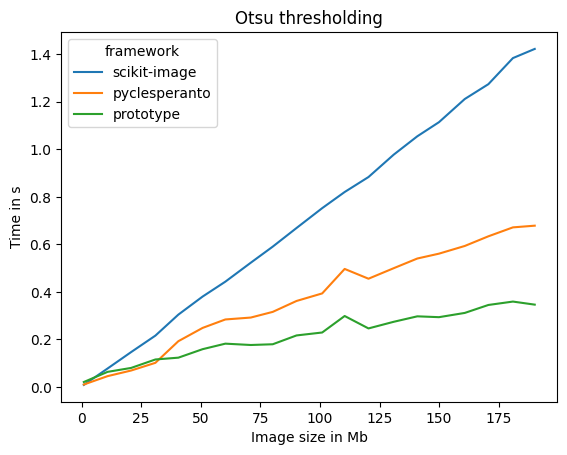

In [9]:
import seaborn as sns

bench = pd.concat([skimage_benchmark_data, pycle_benchmark_data, prototype_benchmark_data])

sns.lineplot(data=bench, x="size", y="time", hue="framework")
plt.title("Otsu thresholding")
plt.xlabel("Image size in Mb")
plt.ylabel("Time in s")
plt.show()